# Graphing data
Graphing different things within the data

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

os.getcwd()
output_location = 'G:/honours/outputs'

## 1. Plotting NMAD v Template

In [225]:
test_directories_list = [f'{output_location}/cdfs/individual_main/individual_main_data.csv',
                         f'{output_location}/cdfs/individual/individual_data.csv',
                         f'{output_location}/cdfs/individual_main_0.05/individual_main_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05/individual_lacy_0.05_data.csv',
                         f'{output_location}/cdfs/individual_lacy_0.05_obs/individual_lacy_0.05_obs_data.csv',
                         f'{output_location}/cdfs/individual_main_agn_above_0.1/individual_main_agn_above_0.1_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4/individual_only_agn_0.4_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.4_obs/individual_only_agn_0.4_obs_data.csv',
                         f'{output_location}/cdfs/individual_lacy2_0.05/individual_lacy2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_donley_all_0.05/individual_donley_all_0.05_data.csv',
                         f'{output_location}/combined/individual_combined_0.05_2/individual_combined_0.05_2_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_rest', 'individual_obs', 'individual_main_0.05', 'individual_lacy_0.05', 'individual_lacy_0.05_obs', 'individual_main_agn_above_0.1', 'individual_only_agn_0.4', 'individual_only_agn_0.4_obs', 'individual_lacy2_0.05', 'bin0.0to0.1_0.05', 'donley_all_0.05', 'individual_combined_0.05_2'] # List of names for each test directory

no_template_nmad_list = [0.013429984, 0.013429984, 0.019863030992036, 0.0323514264448324, 0.0323514264448324, 0.0287771466353268, 0.0555815201454613, 0.0555815201454613, 0.03155071491144223, 0.01800493236298936, 0.049616638403152315, 0.019378955261875105] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

In [226]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present
len(nmad_plot.columns)

13

Text(37.597222222222214, 0.5, 'NMAD - NMAD without templates')

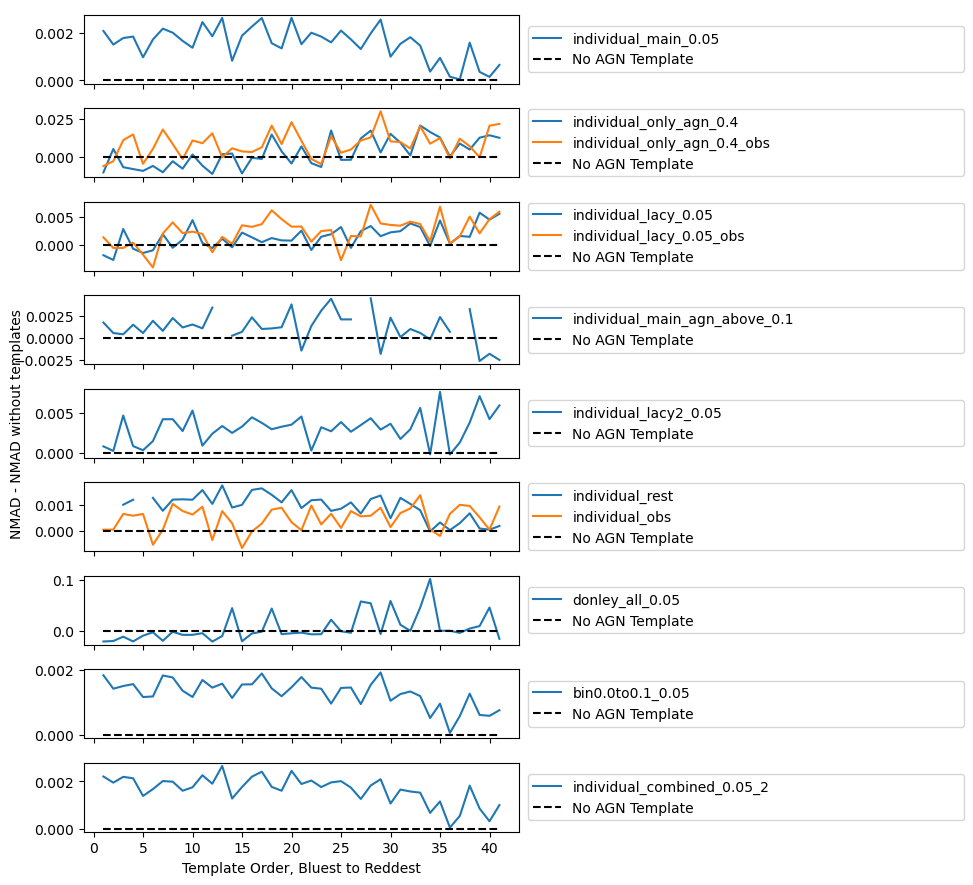

In [227]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)


Same Graph with only AGN Bins

In [134]:
test_directories_list = [f'{output_location}/cdfs/individual_bin0.0to0.1_0.05/individual_bin0.0to0.1_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.1to0.2_0.05/individual_bin0.1to0.2_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.2to0.3_0.05/individual_bin0.2to0.3_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.3to0.4_0.05/individual_bin0.3to0.4_0.05_data.csv',
                         f'{output_location}/cdfs/individual_bin0.4to0.5_0.05/individual_bin0.4to0.5_0.05_data.csv',
                         f'{output_location}/cdfs/individual_only_agn_0.5_0.05/individual_only_agn_0.5_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['individual_bin0.0to0.1', 'individual_bin0.1to0.2', 'individual_bin0.2to0.3', 'individual_bin0.3to0.4', 'individual_bin0.4to0.5', 'individual_only_agn_0.5'] # List of names for each test directory

no_template_nmad_list = [0.018004958, 0.018259684, 0.0254315565614942, 0.0359537225669563, 0.0249133578745259, 0.142984052745047] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < 0.0]}')

Text(37.597222222222214, 0.5, 'NMAD - NMAD without templates')

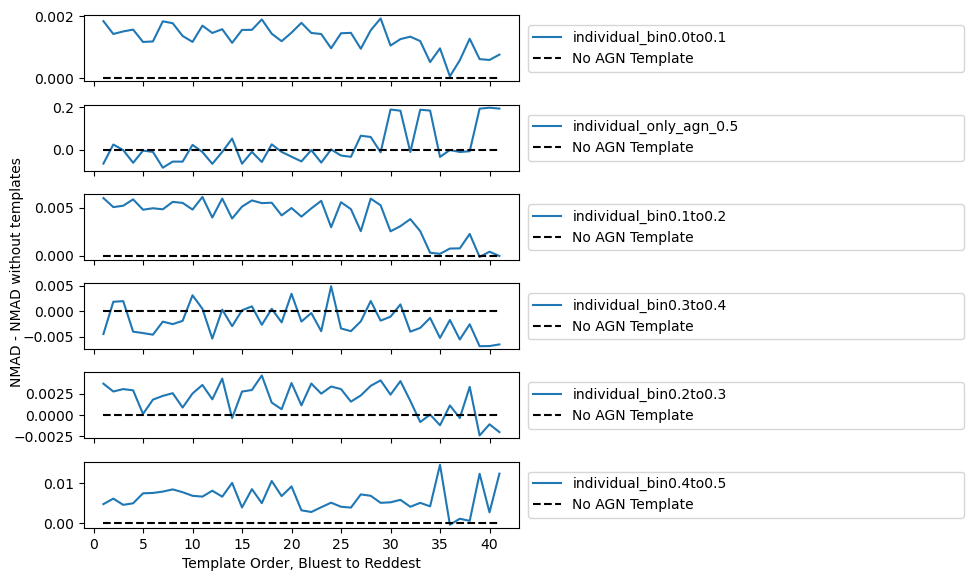

In [135]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

Same Graph with each field

In [350]:
test_directories_list = [f'{output_location}/cdfs/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/cosmos/individual_donley_main_0.05/individual_donley_main_0.05_data.csv',
                         f'{output_location}/uds/individual_donley_main_0.05/individual_donley_main_0.05_data.csv'] # List of all the test directories with NMAD values to load, should each contain the same no. of templates

test_name_list = ['cdfs', 'cosmos', 'uds'] # List of names for each test directory

no_template_nmad_list = [0.0500409075913965,0.0181856141740006,0.01547076554904] # List of NMAD values without templates for each test directory

nmad_df = pd.DataFrame()
nmad_df['template_order'] = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

for test_name in range(len(test_directories_list)):
    total_df = pd.read_csv(test_directories_list[test_name])
    nmad_df[test_name_list[test_name]] = total_df['nmad_val'] - no_template_nmad_list[test_name]
    print(f'Reductive Templates in {test_name_list[test_name]}: \n{nmad_df[nmad_df[test_name_list[test_name]] < -0.05 * no_template_nmad_list[test_name]]}')

Reductive Templates in cdfs: 
    template_order      cdfs
1                1 -0.021017
2                7 -0.019622
5               15 -0.020621
9                6 -0.003147
10              41 -0.015870
12               2 -0.020108
13              21 -0.003768
15              22 -0.007067
16              23 -0.006780
19               9 -0.008157
21              16 -0.005364
22              11 -0.004835
23              19 -0.006741
27               5 -0.009662
30              26 -0.004022
32              10 -0.008061
33               4 -0.020893
34              20 -0.005072
35               3 -0.011614
36              29 -0.006494
37              12 -0.021151
38              37 -0.004281
39              13 -0.010466
Reductive Templates in cosmos: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos]
Index: []
Reductive Templates in uds: 
Empty DataFrame
Columns: [template_order, cdfs, cosmos, uds]
Index: []


Text(37.597222222222214, 0.5, 'NMAD - NMAD without templates')

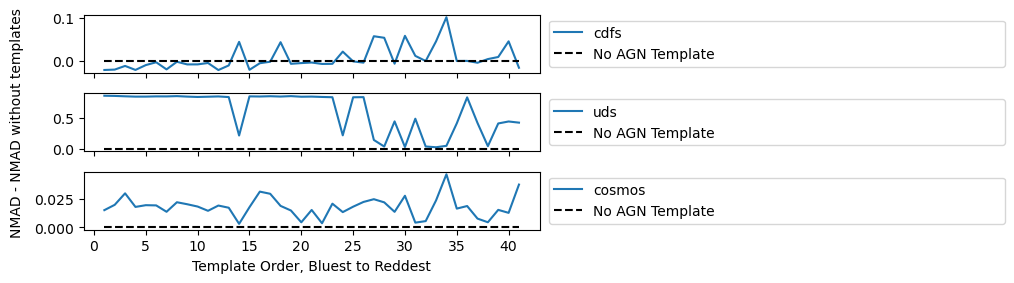

In [351]:
nmad_plot = nmad_df.sort_values('template_order')
nmad_set = set(no_template_nmad_list) # Gets how many catalogues are present

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(nmad_set), figsize=(6, len(nmad_set)), sharex=True)

for i in range(len(nmad_set)):
    for col in range(len(nmad_plot.columns) - 1):
        col2 = col
        col += 1 # Skip the first column as it is the template order
        if no_template_nmad_list[col2] == list(nmad_set)[i]:
            axes[i].plot(nmad_plot['template_order'], nmad_plot.iloc[:,col], label = test_name_list[col2])
    axes[i].plot(nmad_plot['template_order'], np.zeros(len(nmad_plot['template_order'])), label = 'No AGN Template', linestyle = '--', c='k')
    axes[i].legend(bbox_to_anchor=(1.02, 0, 1,1), loc="center left", mode="expand", borderaxespad=0, ncol=1)

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Template Order, Bluest to Reddest')
plt.ylabel('NMAD - NMAD without templates', labelpad=20)

## 2. Surface Plot of residual for each template in test

In [400]:
# Setup the Same as Template Auto reload
os.getcwd()
test_title = 'individual_normal_0.05' # title of the test, eg. 1,2, A, B, Initial.
field = 'cdfs'
id_key = 'normal' # normal, high or low
use_galaxy_templates = True
params = {}
params["Z_STEP"] = 0.05

#opening ZFOURGE data
id_key_dict = {
    'normal': f'inputs/alternate_catalogues/{field}.normal.cat',
    'fraction0.0to0.1': f'inputs/alternate_catalogues/{field}.fraction.bin0.0to0.1.cat',
    'fraction0.1to0.2': f'inputs/alternate_catalogues/{field}.fraction.bin0.1to0.2.cat',
    'fraction0.2to0.3': f'inputs/alternate_catalogues/{field}.fraction.bin0.2to0.3.cat',
    'fraction0.3to0.4': f'inputs/alternate_catalogues/{field}.fraction.bin0.3to0.4.cat',
    'fraction0.4to0.5': f'inputs/alternate_catalogues/{field}.fraction.bin0.4to0.5.cat',
    'ir_agn': f'inputs/alternate_catalogues/{field}.ir_agn.cat',
    'radio_agn': f'inputs/alternate_catalogues/{field}.radio_agn.cat',
    'xray_agn': f'inputs/alternate_catalogues/{field}.xray_agn.cat',
    'only_agn_0.4': f'inputs/alternate_catalogues/{field}.only_agn_above_0.4.cat',
    'only_agn_0.5': f'inputs/alternate_catalogues/{field}.only_agn_above_0.5.cat',
    'lacy': f'inputs/alternate_catalogues/{field}.lacy_wedge.cat',
    'donley': f'inputs/alternate_catalogues/{field}.donley_wedge.cat',
    'useflag': f'inputs/alternate_catalogues/{field}.useflag.cat'
}

main_cat = pd.read_csv(id_key_dict[id_key]) # get the catalogue for the id_key
main_cat.to_csv('inputs/eazy_test.cat', index=False) # create a new catalogue, allows for change to be made in this cell

#Setting up the main catalogue
main = pd.read_csv('inputs/eazy_test.cat', sep=" ", comment="#", header=None, skipinitialspace=True) # opening cut cat, and adjusting it
headers = pd.read_csv('inputs/eazy_test.cat', sep=" ", header=None, nrows=1).iloc[0]
headers = headers[1:]
main.columns = headers
agn_per_dir = f'inputs/{field}_agn_frac.txt' # file with AGN fractions for each object, prepared in catalogue_prepare.ipynb
all_bayes = pd.read_csv(agn_per_dir, sep="\s+", comment='#')

has_fraction = 'bayes.agn.fracAGN' in main.columns
if not has_fraction:
    main = pd.merge(main, all_bayes, on='id', how='left') # AGN fraction for each object

agn_dir = 'templates/hlsp_agnsedatlas_rest/' # dir with all agn templates
agn_temp_all = os.listdir(agn_dir)

# Loading values that are present in catalog, done at the end of EAZY_test.py
columns_to_drop = ['id', 'phot_redshift', 'chi2']
spec_data = pd.read_csv(f'{output_location}/{field}/spec_data.csv')

reindex_list = list(main['id'])
reindex_val = [x - 1 for x in reindex_list] # cat is indexed from 1, not 0
reindex_sel = spec_data['id'].isin(list(reindex_val)) # -1 from each value in the main cat, and use it as a mask for the data
spec_data = spec_data[reindex_sel].reset_index(drop=True)

filter_data = pd.read_csv(f'{output_location}/{field}/filter_data.csv')
flux_data = pd.read_csv(f'{output_location}/{field}/flux_data.csv')

filter_error = flux_data.filter(regex='^e_')
filter_error = filter_error[reindex_sel].reset_index(drop=True)
filter_flux = flux_data.filter(regex='^f_')
filter_flux = filter_flux[reindex_sel].reset_index(drop=True)

In [401]:
check_df = pd.read_csv(f'{output_location}/{field}/{test_title}/induvidual_data_{field}_{id_key}_{params["Z_STEP"]}_[0]_{use_galaxy_templates}.csv')
if len(main) != len(check_df):
    print('Lengths of the main catalog and the test catalog do not match')
    print(f'Main: {len(main)}, Test: {len(check_df)}')
    print('The next cell will not work')
else:
    print('Lengths of the main catalog and the test catalog match')

Lengths of the main catalog and the test catalog match


C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\1158668939.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy() This was a warning, to be fixed later

In [402]:
residual_df = pd.DataFrame()
for template in range(len(agn_temp_all)):
    agn_sed = [template]

    individual_df = pd.read_csv(f'{output_location}/{field}/{test_title}/induvidual_data_{field}_{id_key}_{params["Z_STEP"]}_{agn_sed}_{use_galaxy_templates}.csv')

    # to maintain consitency with EAZY Test, we need to load the data in the same way
    class self_load:
        def __init__(self, idx, ZSPEC, ZBEST, fnu, efnu, efmodel, pivot, zbest):
            self.idx = np.array(main['id'].index)
            self.ZSPEC = np.array(spec_data['zspec'])
            self.fnu = np.array(filter_flux)
            self.efnu = np.array(filter_error)
            self.fmodel = np.array(individual_df.drop(columns=columns_to_drop))
            self.pivot = np.array(filter_data['pivot'])
            self.zbest = np.array(individual_df['phot_redshift'])

    self=self_load(0,0,0,0,0,0,0,0)

    #limit the no of objects to those that are present in all bands, and have a positive redshift
    flux_observed = []
    flux_residual_objects = []

    # Filter section
    filter_attendance = 39 # can miss 1 filter and still be selected
    for i in range(len(self.fnu)):
        if self.ZSPEC[i] < 0.001:
            continue
        if sum(self.fnu[i] <= 0) > filter_attendance:
            continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
        else:
            flux_observed.append(self.fnu[i])
            flux_residual_objects.append(i)
    flux_observed = np.array(flux_observed)

    #find the residuals of the objects
    flux_model = self.fmodel[flux_residual_objects]
    error_observed = self.efnu[flux_residual_objects]
    flux_residual = np.zeros_like(flux_observed)
    residual_uncertainties = []
    for row in range(len(flux_residual_objects)):
        residual_uncertainties.append(error_observed[row] / flux_observed[row])
        for col in range(flux_observed.shape[1]): #no. of bands
            if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
                flux_residual[row, col] = math.nan
            elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
                flux_residual[row, col] = math.nan
            else:
                flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

    #flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
    residual_uncertainties = np.array(residual_uncertainties)

    #redshift the objects
    object_redshifted = []
    pivots = self.pivot
    for i in range(len(flux_residual_objects)):
        im = flux_residual_objects[i]
        redshifted = pivots / (1 + self.ZSPEC[im])
        object_redshifted.append(redshifted)
    object_redshifted = np.array(object_redshifted)

    #plot the residuals
    wavelength_flat = object_redshifted.flatten()
    residual_flat = flux_residual.flatten()
    uncertainties_flat = residual_uncertainties.flatten()

    #binning
    obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
    res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
    res_sorted = res_sorted.sort_values(by='wavelength')
    res_sorted = res_sorted.dropna(how='any') # remove nan
    res_std = np.std(res_sorted['residual'])
    res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
    no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
    res_sorted = res_sorted.reset_index(drop=True)
    res_sorted_copy = res_sorted # not abs
    res_sorted = abs(res_sorted)
    res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
    res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
    for i in range(int(no_of_bins_res)):
        min_loop = i * obj_per_bin
        max_loop = ((i+1) * obj_per_bin)
        med_res = np.median(res_sorted['residual'][min_loop:max_loop])
        med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
        med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
        med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
        confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
        res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
        res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

    residual_df[f'r_{template}'] = res_bin['Median Residuals']
    residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
    residual_df[f'w_{template}'] = res_bin['Median Wavelength']
    residual_df[f'c_{template}'] = res_bin['Confidence']

C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\3099229597.py:92: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'r_{template}'] = res_bin['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\3099229597.py:93: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residual_df[f'rc_{template}'] = res_bin_copy['Median Residuals']
C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\3099229597.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [403]:
residual_df.dropna(inplace=True) # sometimes there is a nan value in the residual
residual_df.head(10)

,r_0,rc_0,w_0,c_0,r_1,rc_1,w_1,c_1,r_2,rc_2,...,w_38,c_38,r_39,rc_39,w_39,c_39,r_40,rc_40,w_40,c_40
0,0.299363,-0.029666,984.863338,0.037556,0.287897,-0.035193,984.863338,0.046327,0.261595,-0.031133,...,984.863338,0.037851,0.304338,-0.040684,984.863338,0.044390,0.291333,-0.031359,984.863338,0.037438
1,0.124867,-0.073227,1241.850397,0.018541,0.131877,-0.081210,1241.319748,0.018475,0.120881,-0.066590,...,1241.850397,0.018540,0.125295,-0.079108,1241.319748,0.018100,0.126326,-0.069008,1241.850397,0.018460
2,0.056583,-0.023050,1413.331967,0.008336,0.054918,-0.025145,1413.147708,0.008279,0.051348,0.002650,...,1413.331967,0.008328,0.050705,-0.004132,1413.147708,0.008183,0.052239,-0.020555,1413.331967,0.008276
3,0.051394,0.008136,1554.074695,0.009340,0.053124,-0.003582,1553.895161,0.009772,0.049315,0.005817,...,1554.074695,0.009359,0.048134,0.013703,1553.895161,0.009311,0.050041,0.008537,1554.074695,0.009302
4,0.054288,0.024491,1664.050711,0.010986,0.049181,0.008223,1663.786069,0.011151,0.048998,0.017129,...,1664.050711,0.011080,0.051357,0.027377,1663.786069,0.010926,0.053287,0.029855,1664.050711,0.010912
5,0.057122,0.026329,1759.323431,0.024189,0.054806,0.017902,1759.137311,0.024601,0.054294,0.020706,...,1759.323431,0.023817,0.058331,0.029940,1759.137311,0.023863,0.058220,0.031068,1759.323431,0.023950
6,0.051943,0.021225,1844.390409,0.011683,0.052862,0.018396,1844.257121,0.011936,0.049934,0.017844,...,1844.964999,0.011707,0.050584,0.027616,1844.257121,0.011637,0.052037,0.024447,1844.390409,0.011463
7,0.051199,0.016118,1942.363483,0.008918,0.048974,0.016565,1942.319713,0.009051,0.044010,0.011262,...,1942.363483,0.008875,0.046699,0.019396,1942.319713,0.008879,0.048952,0.016415,1942.363483,0.008899
8,0.061763,-0.013773,2047.470927,0.012892,0.057729,-0.013388,2047.363126,0.012624,0.058421,-0.015926,...,2047.817145,0.012845,0.056483,-0.010215,2047.363126,0.012795,0.058798,-0.014681,2047.470927,0.012861
9,0.085563,-0.058249,2132.745786,0.020149,0.082383,-0.054693,2132.592911,0.020359,0.076556,-0.054127,...,2133.611109,0.020226,0.070364,-0.041998,2132.592911,0.020126,0.077618,-0.055313,2132.745786,0.020179


In [404]:
# residual for no agn template
individual_df = pd.read_csv(f'{output_location}/{field}/test_6/induvidual_data_{field}_{id_key}_{params["Z_STEP"]}_[]_{use_galaxy_templates}.csv')

self=self_load(0,0,0,0,0,0,0,0)

#limit the no of objects to those that are present in all bands, and have a positive redshift
flux_observed = []
flux_residual_objects = []

# Filter section
filter_attendance = 39 # can miss 1 filter and still be selected
for i in range(len(self.fnu)):
    if self.ZSPEC[i] < 0.001:
        continue
    if sum(self.fnu[i] <= 0) > filter_attendance:
        continue # don't use objects where more than filter attendance filters are missing (eg. if one filter_attendance is 1, if one filter is missing it still goes forward, if two are missing it doesn't)
    else:
        flux_observed.append(self.fnu[i])
        flux_residual_objects.append(i)
flux_observed = np.array(flux_observed)

#find the residuals of the objects
flux_model = self.fmodel[flux_residual_objects]
error_observed = self.efnu[flux_residual_objects]
flux_residual = np.zeros_like(flux_observed)
residual_uncertainties = []
for row in range(len(flux_residual_objects)):
    residual_uncertainties.append(error_observed[row] / flux_observed[row])
    for col in range(flux_observed.shape[1]): #no. of bands
        if flux_observed[row,col] == -99: # if the flux is -99, it is not recorded and should not be shown as such
            flux_residual[row, col] = math.nan
        elif flux_model[row,col] == 0: # some models have no flux, this means they will be removed later
            flux_residual[row, col] = math.nan
        else:
            flux_residual[row,col] = (flux_observed[row,col] - flux_model[row,col]) / flux_observed[row,col]

#flux_residual = flux_residual[~np.isnan(flux_residual).any(axis=1)] # remove nan values
residual_uncertainties = np.array(residual_uncertainties)

#redshift the objects
object_redshifted = []
pivots = self.pivot
for i in range(len(flux_residual_objects)):
    im = flux_residual_objects[i]
    redshifted = pivots / (1 + self.ZSPEC[im])
    object_redshifted.append(redshifted)
object_redshifted = np.array(object_redshifted)

#plot the residuals
wavelength_flat = object_redshifted.flatten()
residual_flat = flux_residual.flatten()
uncertainties_flat = residual_uncertainties.flatten()

#binning
obj_per_bin = round(0.5 * sum(self.ZSPEC > 0.001)) #EAZY used 2000
res_sorted = pd.DataFrame({'wavelength':wavelength_flat, 'residual':residual_flat, 'uncertainties':uncertainties_flat})
res_sorted = res_sorted.sort_values(by='wavelength')
res_sorted = res_sorted.dropna(how='any') # remove nan
res_std = np.std(res_sorted['residual'])
res_sorted = res_sorted[abs(res_sorted['residual']) < 3 * res_std] # remove 3sig outliers
no_of_bins_res = np.ceil(len(res_sorted) // obj_per_bin)
res_sorted = res_sorted.reset_index(drop=True)
res_sorted_copy = res_sorted # not abs
res_sorted = abs(res_sorted)
res_bin = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", "Confidence"])
res_bin_copy = pd.DataFrame(columns=["Median Residuals", "Median Wavelength", "Median Uncertainties", 'Confidence'])
for i in range(int(no_of_bins_res)):
    min_loop = i * obj_per_bin
    max_loop = ((i+1) * obj_per_bin)
    med_res = np.median(res_sorted['residual'][min_loop:max_loop])
    med_res_copy = np.median(res_sorted_copy['residual'][min_loop:max_loop]) # only the residuals should be affected by abs
    med_wave = np.median(res_sorted['wavelength'][min_loop:max_loop])
    med_unc = np.median(res_sorted['uncertainties'][min_loop:max_loop])
    confidence =  (50/68.2) * 1.2533 * (np.std(res_sorted_copy['residual'][min_loop:max_loop])/np.sqrt(obj_per_bin)) # want 50% confidence interval from standard error of the median
    res_bin.loc[i] = [med_res, med_wave, med_unc, confidence]
    res_bin_copy.loc[i] = [med_res_copy, med_wave, med_unc, confidence] # copy is not abs, used in plot with negative values

residual_df[f'r_-1'] = res_bin['Median Residuals']
residual_df[f'rc_-1'] = res_bin_copy['Median Residuals']
residual_df[f'w_-1'] = res_bin['Median Wavelength']
residual_df[f'c_-1'] = res_bin['Confidence']

In [405]:
# x is template, y is wavelength, z is residual
#x = np.linspace(0, len(agn_temp_all) - 1, len(agn_temp_all), dtype=int)
x = [40,1,7,25,18,15,28,39,8,6,41,34,2,21,35,22,23,24,17,9,38,16,11,19,31,14,33,5,32,36,26,30,10,4,20,3,29,12,37,13,27]

def y_value(x):
    return np.log(np.array(residual_df[f'w_{x}']))

def z_value(x):
    return np.array(residual_df[f'r_{x}'])

def z_value_copy(x):
    return np.array(residual_df[f'rc_{x}'])

def c_value(x):
    return np.array(residual_df[f'c_{x}'])

def diff_value(x):
    return np.array(((residual_df[f'r_{x}']) - residual_df[f'r_-1']) / residual_df[f'r_-1'])

Text(0.5, 0.92, 'Residual Difference for individual_normal_0.05 in cdfs')

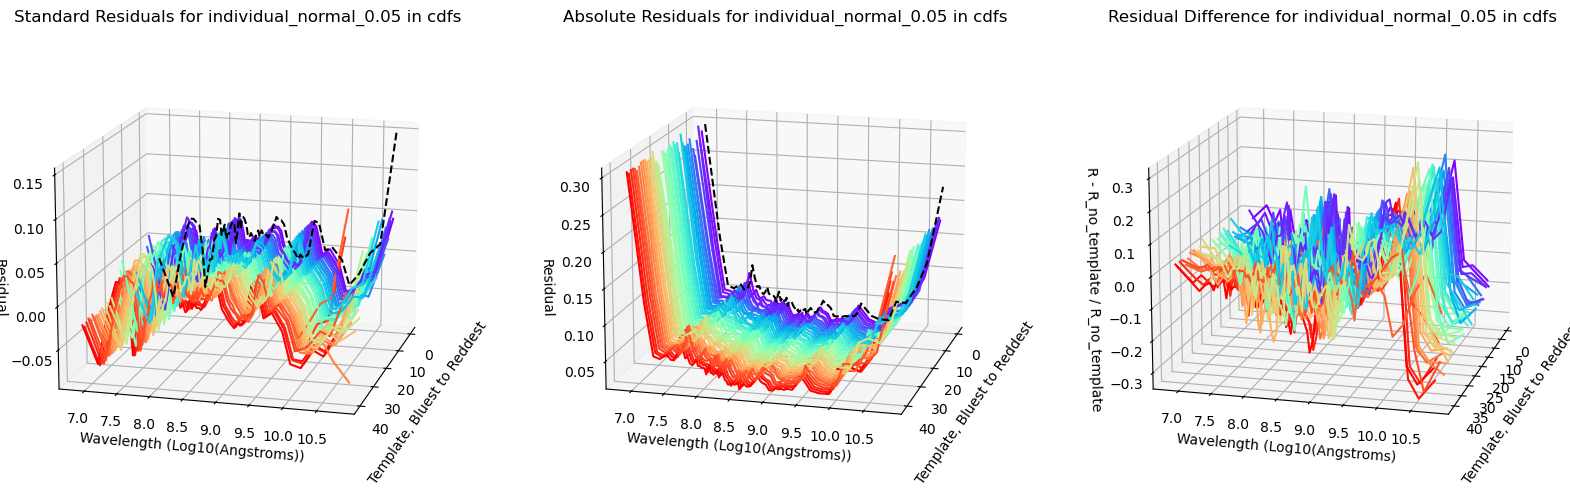

In [406]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 40), subplot_kw={'projection': '3d'})
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(x))]
for idx, temp_number in enumerate(x):
    # temp_number -= 1 # to get the correct template number
    ax1.plot([temp_number] * residual_df.shape[0], y_value(idx), z_value_copy(idx), label=f'{i}', color=colors[temp_number-1])
    ax2.plot([temp_number] * residual_df.shape[0], y_value(idx), z_value(idx), label=f'{i}', color=colors[temp_number-1])
    ax3.plot([temp_number] * residual_df.shape[0], y_value(idx), diff_value(idx), label=f'{i}', color=colors[temp_number-1])
ax1.plot([-1] * residual_df.shape[0], y_value(-1), z_value_copy(-1), label=f'{-1}', c='k', ls='--')
ax2.plot([-1] * residual_df.shape[0], y_value(-1), z_value(-1), label=f'{-1}', c='k', ls='--')
ax1.set_xlabel('Template, Bluest to Reddest')
ax2.set_xlabel('Template, Bluest to Reddest')
ax3.set_xlabel('Template, Bluest to Reddest')
ax1.set_ylabel('Wavelength (Log10(Angstroms))')
ax2.set_ylabel('Wavelength (Log10(Angstroms))')
ax3.set_ylabel('Wavelength (Log10(Angstroms)')
ax1.set_zlabel('Residual')
ax2.set_zlabel('Residual')
ax3.set_zlabel('R - R_no_template / R_no_template')
ax1.view_init(elev=15., azim=15)
ax2.view_init(elev=15., azim=15)
ax3.view_init(elev=15., azim=15)
ax1.set_title(f'Standard Residuals for {test_title} in {field}')
ax2.set_title(f'Absolute Residuals for {test_title} in {field}')
ax3.set_title(f'Residual Difference for {test_title} in {field}')

C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\3614764187.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(temp_number, np.mean(diff_value(idx)), c=colors[temp_number-1])


Text(0.5, 1.0, 'Average Residual Difference for individual_normal_0.05 in cdfs')

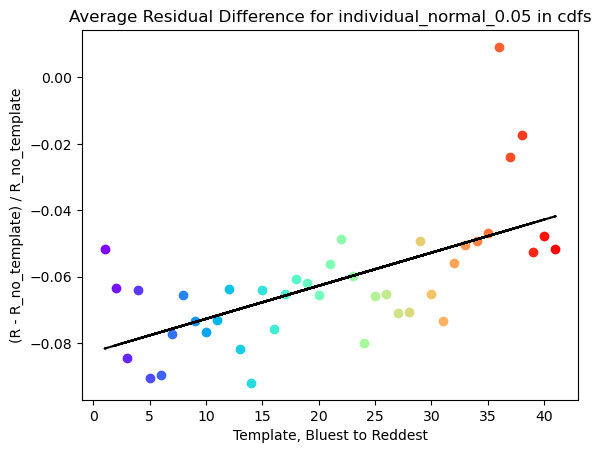

In [407]:
# averaging the residuals
from scipy.stats import linregress

average_res = []
for idx, temp_number in enumerate(x):
    average_res.append(np.mean(diff_value(idx)))
    plt.scatter(temp_number, np.mean(diff_value(idx)), c=colors[temp_number-1])

#plt.plot([0, len(x)], [0, 0], c='k', ls='-')
x_df = pd.DataFrame({'x':x})
sim_reg = linregress(x_df['x'], average_res)
plt.plot(x_df, sim_reg.intercept + sim_reg.slope * x_df['x'], c='k', ls='--')

plt.xlabel('Template, Bluest to Reddest')
plt.ylabel('(R - R_no_template) / R_no_template')
plt.title(f'Average Residual Difference for {test_title} in {field}')

C:\Users\eddie\AppData\Local\Temp\ipykernel_27868\2789775427.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(temp_number, single_df['nmad_val'][idx], np.mean(diff_value(idx)), c=colors[temp_number-1])


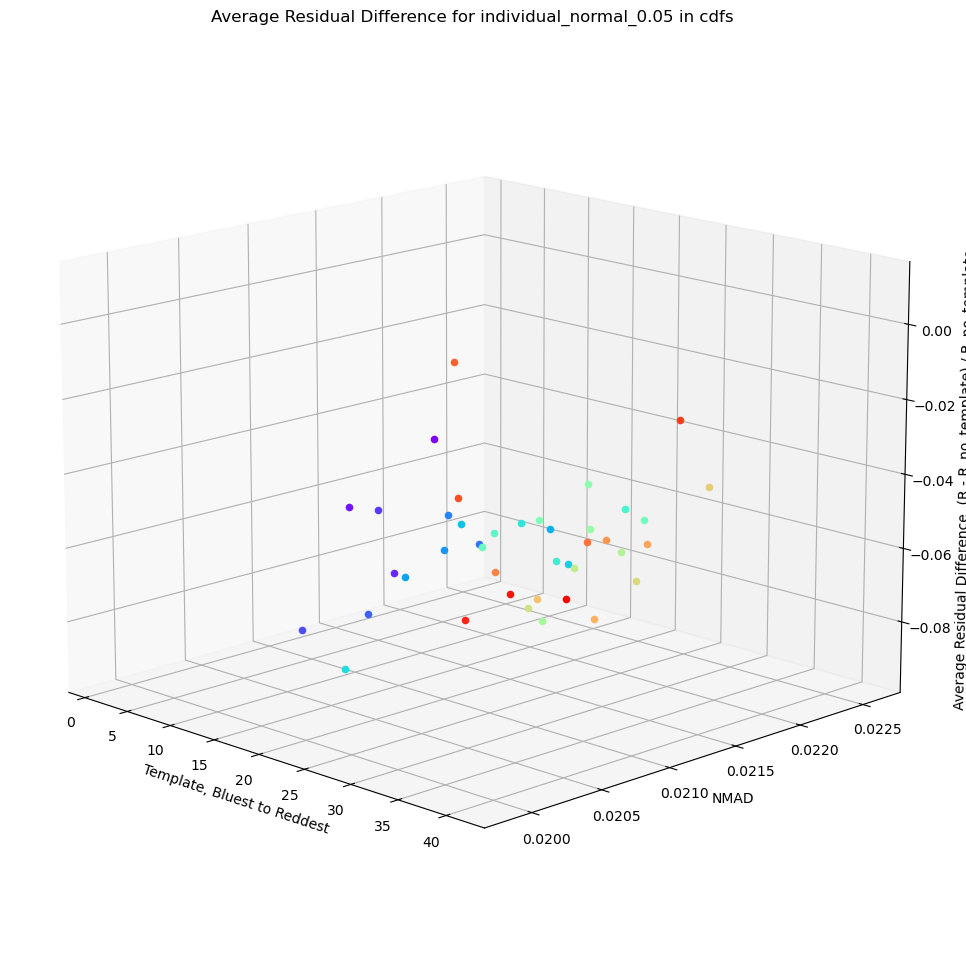

In [408]:
# plotting above with nmad values
single_df = pd.read_csv(f'{output_location}/{field}/{test_title}/{test_title}_data.csv')

fig, ax = plt.subplots(1, 1, figsize=(12, 12), subplot_kw={'projection': '3d'})

for idx, temp_number in enumerate(x):
    ax.scatter(temp_number, single_df['nmad_val'][idx], np.mean(diff_value(idx)), c=colors[temp_number-1])

ax.set_xlabel('Template, Bluest to Reddest')
ax.set_ylabel('NMAD')
ax.set_zlabel('Average Residual Difference, (R - R_no_template) / R_no_template')
ax.set_title(f'Average Residual Difference for {test_title} in {field}')
ax.view_init(elev=15., azim=-45)

In [409]:
# PCA of residuals to see which templates are the most similar in terms of fitting.
# first up, normalisation. I want to use the copy, as it has the negative values and therefore more variance.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

residual_df_copy = residual_df.filter(regex='^rc_') # we want the copy
residual_df_copy = residual_df_copy.drop(columns=['rc_-1']) # remove no template column
scaler = StandardScaler()
data_standardised = scaler.fit_transform(residual_df_copy)
residual_df_copy_standardised = pd.DataFrame(np.transpose(data_standardised))
residual_df_copy_standardised.describe()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-1.341282,-3.558802,-0.786286,0.019104,0.766728,1.089542,0.944495,0.685087,-0.618902,-2.387320,...,1.511630,1.279420,-0.258030,0.011984,-0.810681,-2.397070,-2.277870,-1.387646,-1.451006,0.918771
std,0.604311,0.271061,0.367850,0.340856,0.334236,0.212746,0.198277,0.158955,0.171792,0.232680,...,0.174410,0.121097,0.064963,0.075406,0.054070,0.155438,0.263166,0.300932,0.499016,1.435469
min,-3.113812,-4.146266,-1.289435,-0.900611,0.045721,0.651359,0.552843,0.341760,-0.960268,-2.922961,...,0.610348,0.797143,-0.483110,-0.292749,-0.880041,-2.642082,-2.615430,-1.704260,-2.506673,-3.394128
25%,-1.545743,-3.743571,-1.015081,-0.208546,0.563773,0.975554,0.789415,0.567814,-0.717334,-2.547157,...,1.486366,1.268520,-0.269724,-0.017439,-0.851136,-2.480021,-2.437187,-1.614034,-1.811222,-0.097530
50%,-1.387175,-3.572241,-0.821898,0.123723,0.769353,1.064062,0.972727,0.694747,-0.648955,-2.362636,...,1.536723,1.303873,-0.250368,0.033254,-0.819557,-2.436809,-2.348758,-1.443791,-1.482845,0.856615
75%,-1.265775,-3.412597,-0.659308,0.227755,1.034122,1.188201,1.046717,0.796951,-0.456902,-2.236781,...,1.588866,1.336911,-0.223610,0.051065,-0.782449,-2.317247,-2.123178,-1.253690,-1.202716,1.979355
max,0.473012,-2.909904,0.115641,0.641655,1.399519,1.589303,1.286313,1.057273,-0.221525,-1.931896,...,1.717231,1.471409,-0.151760,0.133386,-0.617761,-1.826221,-1.074788,-0.128700,0.161292,4.290362


Text(0, 0.5, 'Principal Component 2')

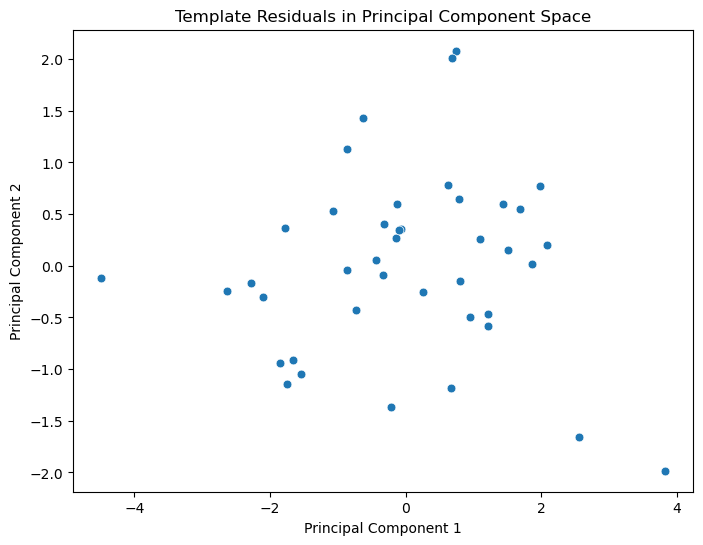

In [410]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(np.transpose(data_standardised))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], s=40)
plt.title("Template Residuals in Principal Component Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\s

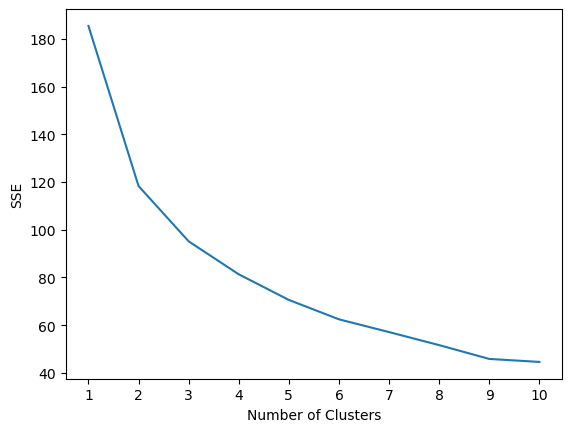

In [411]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(np.transpose(data_standardised))
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [412]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(np.transpose(data_standardised))

#view cluster assignments for each observation
kmeans.labels_

C:\Users\eddie\anaconda3\envs\SEDTemplate_conda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1])

Text(0, 0.5, 'Principal Component 2')

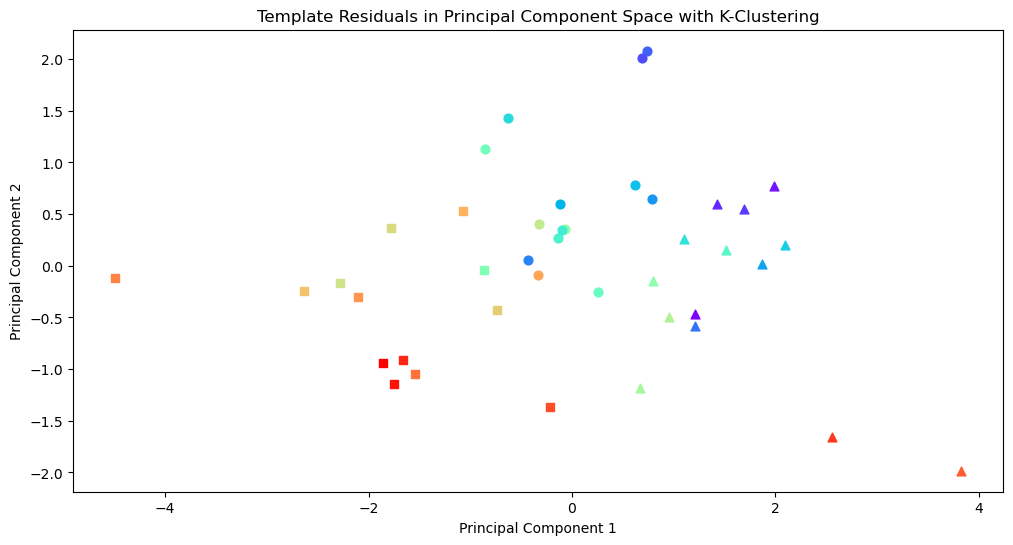

In [414]:
plt.figure(figsize=(12, 6))
markers = ['o', 's', '^']
colours_list = []
for idx, template in enumerate(x):
    colours_list.append(colors[template-1])

for idx,colour in enumerate(colours_list):
    if kmeans.labels_[idx] == 0:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    elif kmeans.labels_[idx] == 1:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
    else:
        plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Template {x[idx]}', marker=markers[kmeans.labels_[idx]], color=colour, s=40)
#plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Template Residuals in Principal Component Space with K-Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## Chi 2 vs Nmad for each template

In [420]:
test_title = 'donley_main_0.05'
test_dir = f'{output_location}/cdfs/individual_{test_title}'
single_df = pd.read_csv(f'{test_dir}/individual_{test_title}_data.csv')

chi2_all = []
for template in single_df['agn_templates']:
    single_temp_df = pd.read_csv(f'{test_dir}/induvidual_data_cdfs_donley_0.05_{template}_True.csv')
    chi2_all.append(single_temp_df['chi2'])

In [417]:
def normalizer(array):
    new_array = np.zeros_like(array)
    for i in range(len(array)):
        if max(array[i]) == min(array[i]):
            new_array[i] = np.zeros_like(array[i])
        else:
            new_array[i] = (array[i] - min(array[i])) / (max(array[i]) - min(array[i]))
    return new_array

chi2_array = normalizer(np.transpose(np.array(chi2_all)))

best_fit = np.zeros((len(chi2_array), 2))
for fit in range(len(chi2_array)):
    min_indices = np.argmin(chi2_array[fit])
    best_fit[fit] = [chi2_array[fit, min_indices], single_df[(single_df['agn_templates'] == f'[{min_indices}]')]['nmad_val'].iloc[0]]

Text(0.5, 1.0, 'Chi2 vs Nmad for each template')

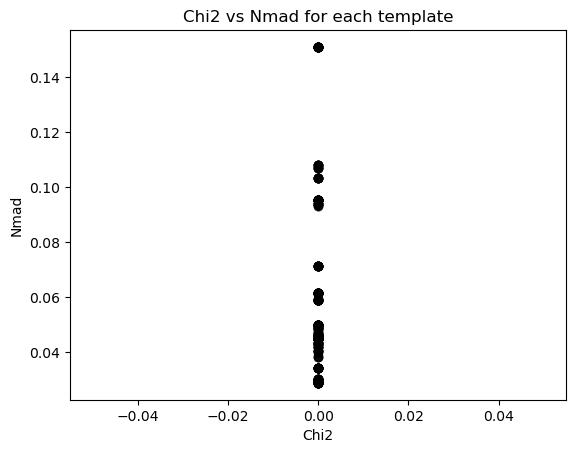

In [422]:
plt.scatter(best_fit[:,0], best_fit[:,1], c='k', alpha=0.5)
plt.xlabel('Chi2')
plt.ylabel('Nmad')
plt.title('Chi2 vs Nmad for each template')

Text(0.5, 1.0, 'Distribution of NMAD for Best AGN Template Fits for donley_main_0.05')

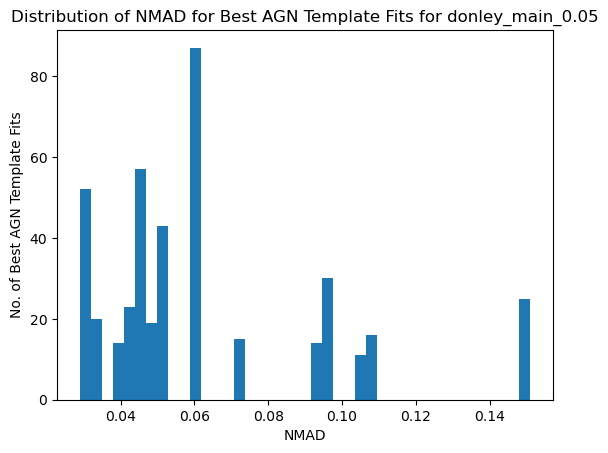

In [423]:
plt.hist(best_fit[:,1], bins=chi2_array.shape[1])
#plt.plot([0.0199, 0.0199], [0, 3000], c='k', ls='--') # plot of standard nmad
plt.xlabel('NMAD')
plt.ylabel('No. of Best AGN Template Fits')
plt.title(f'Distribution of NMAD for Best AGN Template Fits for {test_title}')